#Analyze CIFAR10 using GradCAM

**Objective**:
* Analyze the CIFAR 10 failures using GradCAM

**Approach:**
* Use Pretrained ResNet18 model

## Get the Dataset

In [1]:
import numpy as np
from keras.datasets import cifar10

Using TensorFlow backend.


In [0]:
# load cifar10 dataset
((trainX, trainY), (testX, testY)) = cifar10.load_data()

In [3]:
print(trainX.shape, trainY.shape)

(50000, 32, 32, 3) (50000, 1)


In [0]:
print(testX.shape, testY.shape)

### Distribution of data

In [4]:
np.unique(trainY)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
np.unique(trainY, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

### Visualize Data

In [0]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog',      'frog',     'horse', 'ship', 'truck']

In [0]:
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
trainX[0].shape

(32, 32, 3)

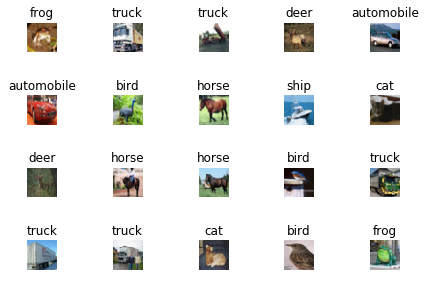

In [9]:
# show 20 images
num_rows = 4
num_cols =5
fig, ax = plt.subplots(num_rows, num_cols)
for i in range(0, num_rows * num_cols):
    row = int(i / num_cols)
    col = int(i % num_cols)
    #print(row)
    ax[row, col].axis('off')
    ax[row, col].imshow(trainX[i])
    
    label_id = int(trainY[i])
    ax[row, col].set_title(label_names[label_id])
    #ax[row, col].tight()
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

## Use Pretrained Model

In [10]:
pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-45ac0xy6
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-45ac0xy6
  Running command git submodule update --init --recursive -q
  Stored in directory: /tmp/pip-ephem-wheel-cache-jxlq4lol/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


In [0]:
import keras
from classification_models.resnet import ResNet18, preprocess_input


In [12]:
n_classes = 10

# build model
base_model = ResNet18(input_shape=(32,32,3), weights='imagenet', include_top=False)
x = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation='softmax')(x)
model = keras.models.Model(inputs=[base_model.input], outputs=[output])

W0702 09:10:16.265431 139799817648000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 09:10:16.305507 139799817648000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0702 09:10:16.306895 139799817648000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0702 09:10:16.313310 139799817648000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0702 09:10:16.314712 139799

In [13]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn0 (Batch

In [0]:
# freezing most of the layers results in low accuracy.
# on the other hand, train all layers as training time is less.
# freeze base layers
#for layer in base_model.layers:
#  #print (layer.trainable)
 # layer.trainable = False

In [15]:
model.get_layer('stage4_unit2_conv2').trainable

True

### Preprocess Data

In [0]:
pre_trainX = preprocess_input(trainX)

In [18]:
pre_trainX.shape

(50000, 32, 32, 3)

In [0]:
#pre_trainX[0]

In [0]:
#trainX[0]

### Split Train Data

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_val, y_train, y_val = train_test_split(trainX, trainY, test_size=0.20, random_state=123)

In [21]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(40000, 1)
(10000, 1)


In [22]:
np.unique(y_val, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1036,  971,  979, 1017, 1046,  993,  970,  950, 1022, 1016]))

### Vectorize the labels

In [0]:
from sklearn.preprocessing import LabelBinarizer

In [0]:
lb = LabelBinarizer()

In [0]:
y_train_bin = lb.fit_transform(y_train)

In [0]:
y_val_bin = lb.transform(y_val)

In [27]:
y_train_bin[0:3]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

### Compile Model

In [28]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

W0702 09:11:19.731648 139799817648000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



### Train data

In [29]:
H1 = model.fit(X_train, y_train_bin, validation_data=(X_val, y_val_bin), epochs=5)

W0702 09:11:28.861461 139799817648000 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 88s 2ms/step - loss: 1.0475 - acc: 0.6377 - val_loss: 0.7541 - val_acc: 0.7330
Epoch 2/5
40000/40000 [==============================] - 83s 2ms/step - loss: 0.6643 - acc: 0.7689 - val_loss: 0.6607 - val_acc: 0.7640
Epoch 3/5
40000/40000 [==============================] - 83s 2ms/step - loss: 0.5314 - acc: 0.8152 - val_loss: 0.6309 - val_acc: 0.7851
Epoch 4/5
40000/40000 [==============================] - 83s 2ms/step - loss: 0.4193 - acc: 0.8542 - val_loss: 0.6363 - val_acc: 0.7861
Epoch 5/5
40000/40000 [==============================] - 82s 2ms/step - loss: 0.3323 - acc: 0.8849 - val_loss: 0.6491 - val_acc: 0.7894


In [0]:
## Unfreeze some of the mid and later layers
#print(len(base_model.layers))

In [0]:
''' 
cnt = 0
for layer in base_model.layers:
  if cnt < 25:
    layer.trainable = False
  else :
    layer.trainable = True
  cnt = cnt +1
'''

' \ncnt = 0\nfor layer in base_model.layers:\n  if cnt < 25:\n    layer.trainable = False\n  else :\n    layer.trainable = True\n  cnt = cnt +1\n'

In [30]:
## let's train for 5 more epochs
H2 = model.fit(X_train, y_train_bin, validation_data=(X_val, y_val_bin), epochs=5)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 82s 2ms/step - loss: 0.2715 - acc: 0.9062 - val_loss: 0.6853 - val_acc: 0.7918
Epoch 2/5
40000/40000 [==============================] - 82s 2ms/step - loss: 0.2085 - acc: 0.9277 - val_loss: 0.7061 - val_acc: 0.7981
Epoch 3/5
40000/40000 [==============================] - 82s 2ms/step - loss: 0.1659 - acc: 0.9421 - val_loss: 0.7137 - val_acc: 0.8080
Epoch 4/5
40000/40000 [==============================] - 82s 2ms/step - loss: 0.1343 - acc: 0.9521 - val_loss: 0.7725 - val_acc: 0.8001
Epoch 5/5
40000/40000 [==============================] - 82s 2ms/step - loss: 0.1080 - acc: 0.9622 - val_loss: 0.7897 - val_acc: 0.8005


### Save Model

In [0]:
model.save('cifar10.hdf5')

In [32]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
!cp cifar10.hdf5 '/content/gdrive/My Drive/App/EIP_Phase2'

### Predict

In [0]:
pred = model.predict(X_val)

In [0]:
pred = np.argmax(pred, axis=1)

In [36]:
pred[0:5]

array([4, 2, 1, 2, 8])

In [37]:
y_val[0:5]

array([[4],
       [2],
       [1],
       [2],
       [8]], dtype=uint8)

## Collect Metrics

In [0]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_val, pred, target_names = label_names))

              precision    recall  f1-score   support

    airplane       0.82      0.87      0.84      1036
  automobile       0.92      0.88      0.90       971
        bird       0.69      0.75      0.72       979
         cat       0.61      0.74      0.67      1017
        deer       0.80      0.73      0.76      1046
         dog       0.77      0.57      0.66       993
        frog       0.80      0.89      0.84       970
       horse       0.84      0.82      0.83       950
        ship       0.90      0.90      0.90      1022
       truck       0.90      0.87      0.88      1016

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



In [0]:
pred_fail = []
## collect the failing cases
for i in range(0, len(y_val)) :
  if y_val[i] != pred[i] :
    pred_fail.append(i)

In [41]:
print(len(pred_fail))

1995


In [42]:
fail_id = pred_fail[0]
print(fail_id)

7


In [43]:
#print(y_val[6], pred[6])
print(y_val[fail_id], pred[fail_id])

[6] 4


In [44]:
print('actual:', label_names[int(y_val[fail_id])], ' predicted: ', label_names[pred[fail_id]])

actual: frog  predicted:  deer


## Visualize few failures

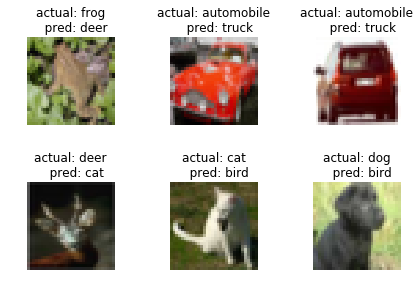

In [45]:
num_rows = 2
num_cols = 3
fig, ax = plt.subplots(num_rows, num_cols)
for i in range(0, num_rows * num_cols):
    row = int(i / num_cols)
    col = int(i % num_cols)
    #print(row)
    ax[row, col].axis('off')
    img_id = pred_fail[i]
    #print(img_id)
    ax[row, col].imshow(X_val[img_id])
    
    actual_name = label_names[int(y_val[img_id])]
    pred_name   = label_names[pred[img_id]]
    #print('actual:', actual_name, ' pred: ', pred_name)
    
    title = 'actual: ' + actual_name + '\n   pred: ' + pred_name
    ax[row, col].set_title(title)
     
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

## Use Grad-CAM to analyze failures

In [0]:
import keras.backend as K


*  [Gradient Weighted Class Activation Map - Grad-CAM blog](http://www.hackevolve.com/where-cnn-is-looking-grad-cam/)

In [0]:

# get gradient weighted class activation map
# inputs: image, 
#         pred_class 
#         and the layer to look at for class activation maps.
#
def get_GradCAM(img, pred_class, layerNameForCAM, num_channel):
  #get the conv layer
  last_conv_layer = model.get_layer(layerNameForCAM)
  
  class_output = model.output[:, pred_class]
  
  # get the gradients
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  
  x = np.expand_dims(img, axis=0)
  
  pooled_grads_value, conv_layer_output_value = iterate([x])
  
  for i in range(num_channel):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
  return conv_layer_output_value

In [0]:
def get_heat_map(img, conv_layer_output_value):
  ## heatmap
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  
  superimposed_img = cv2.addWeighted(fail_img, 0.6, heatmap, 0.4, 0)
  return superimposed_img


In [0]:
import cv2
from google.colab.patches import cv2_imshow

In [0]:
def display_images(img, actual_name, heatmap_img, pred_name):
  plt.imshow(img)
  act_label = 'actual: ' + actual_name
  plt.title(act_label)
  
  plt.show()
  
  #heatmap
  plt.imshow(heatmap_img)
  pred_label = 'predicted: ' + pred_name
  plt.title(pred_label)
  
  plt.show()

In [0]:
def display_images_side_by_side(img, actual_name, heatmap_img, pred_name):
  fig, axes = plt.subplots(1,2)
  axes[0].imshow(img)
  axes[0].set_title(actual_name)
  
  axes[1].imshow(heatmap_img)
  axes[1].set_title(pred_name)
  plt.show()
  
def cv_display_images(img, actual_name, heatmap_img, pred_name):
  cv2_imshow(img)
  #act_label = 'actual: ' + actual_name
   
  #heatmap
  cv2_imshow(heatmap_img)
  
 

In [0]:
group_fail_list = [ [], [], [], [], [], 
               [], [], [], [], [] ]

# group the first 50 failures
for i in range(0,50):
  fail_id = pred_fail[i]
  orig_label_id = int(y_val[fail_id])
  #print(orig_label_id)
  
  group_fail_list[orig_label_id].append(fail_id)

In [56]:
group_fail_list

[[152, 210],
 [9, 10, 41, 198],
 [29, 34, 90, 158],
 [19, 55, 82, 122, 177],
 [12, 51, 57, 129, 167, 180, 196],
 [27, 42, 44, 68, 72, 75, 81, 87, 111, 145, 166, 173, 174, 181, 185],
 [7, 31, 206],
 [114, 148, 153, 183],
 [66, 110, 131, 147],
 [146, 165]]

------------- actual: airplane ----------------


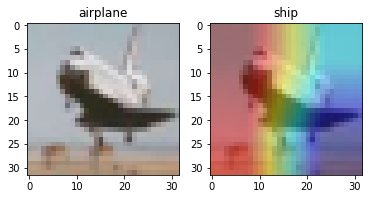

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


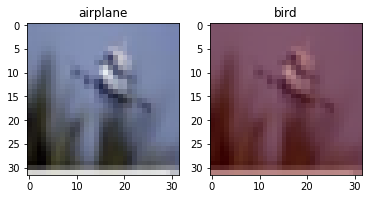

------------- actual: automobile ----------------


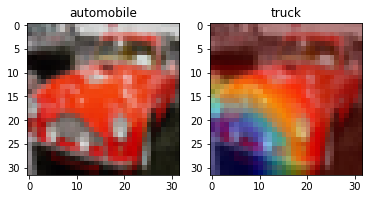

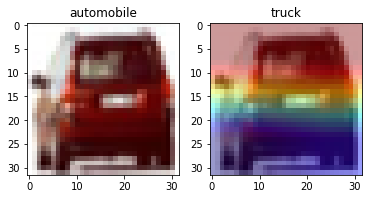

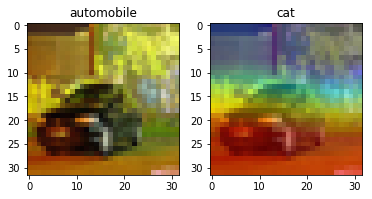

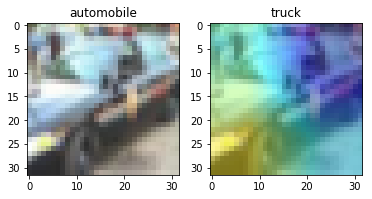

------------- actual: bird ----------------


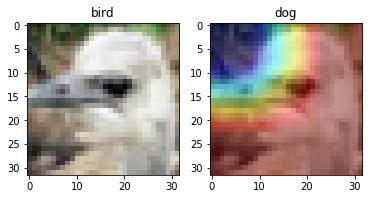

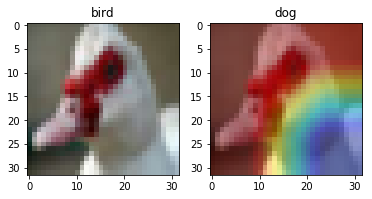

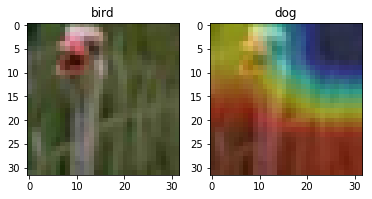

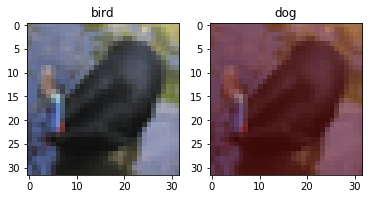

------------- actual: cat ----------------


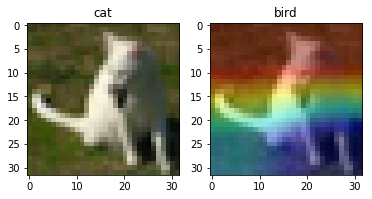

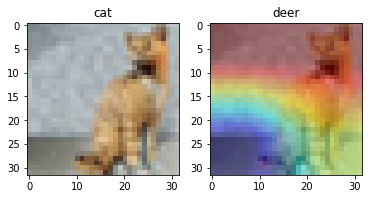

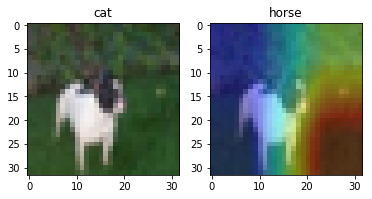

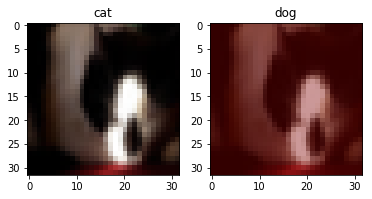

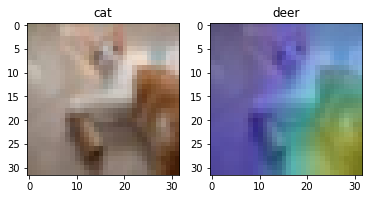

------------- actual: deer ----------------


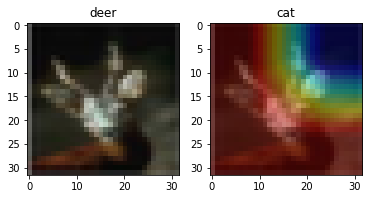

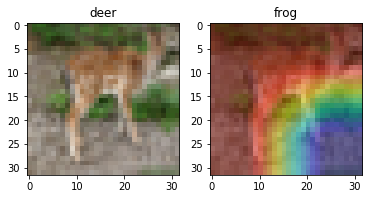

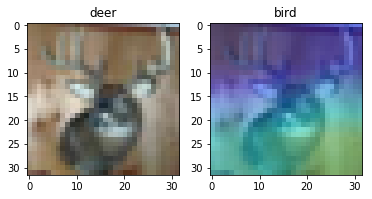

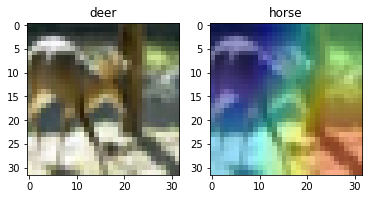

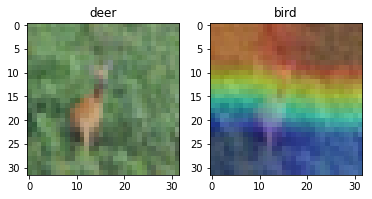

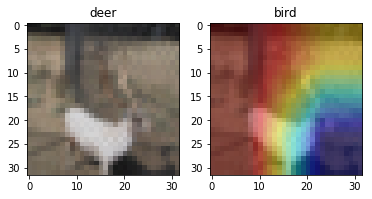

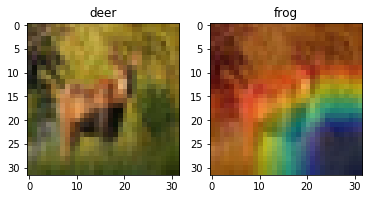

------------- actual: dog ----------------


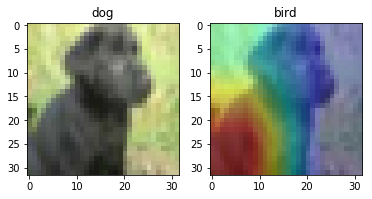

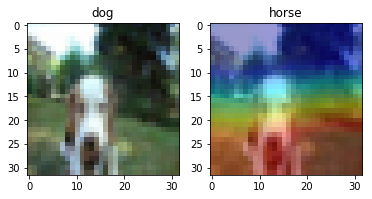

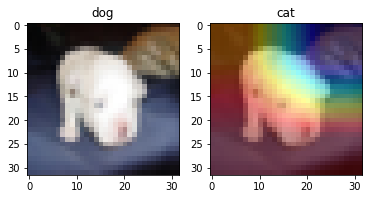

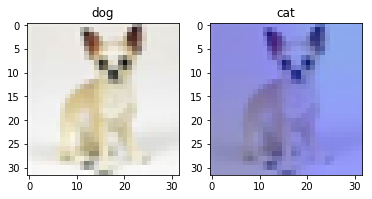

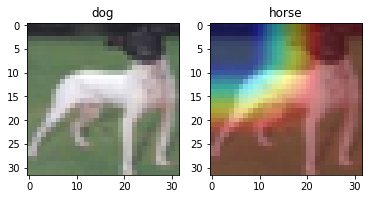

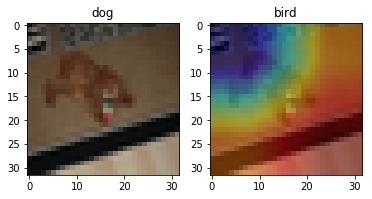

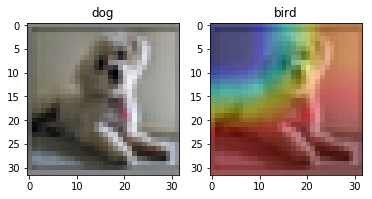

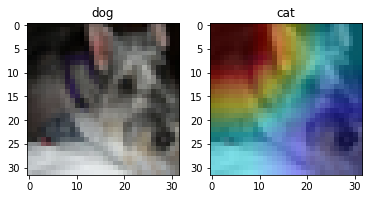

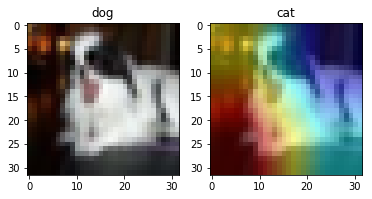

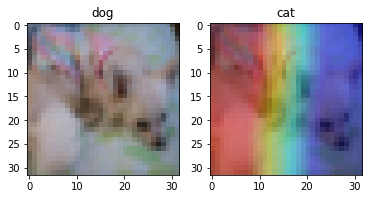

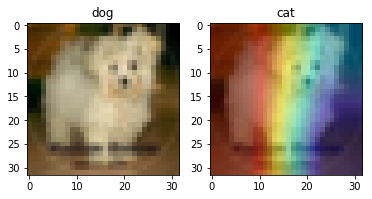

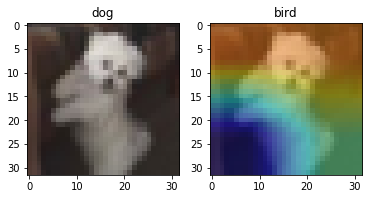

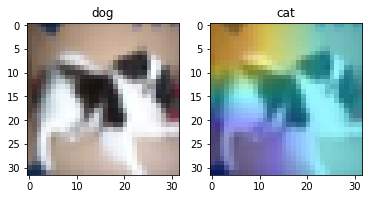

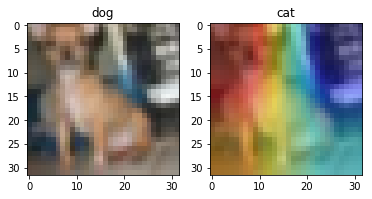

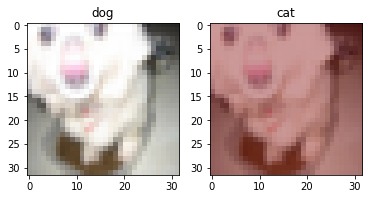

------------- actual: frog ----------------


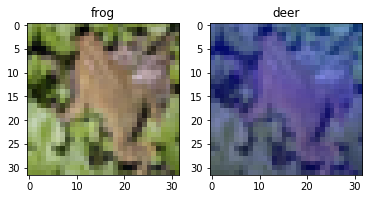

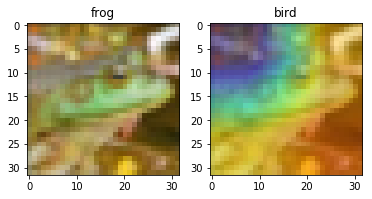

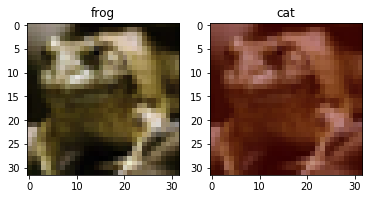

------------- actual: horse ----------------


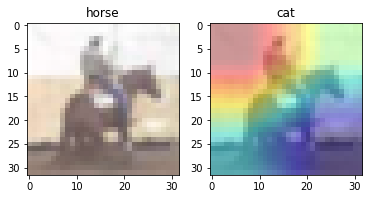

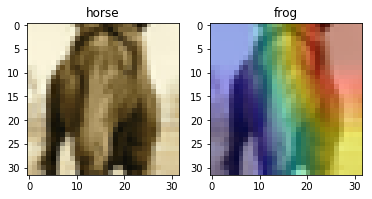

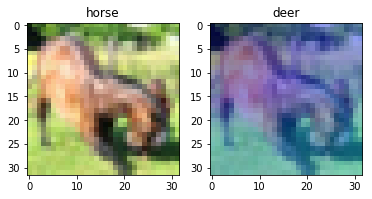

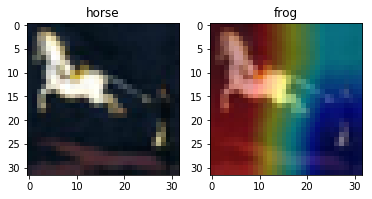

------------- actual: ship ----------------


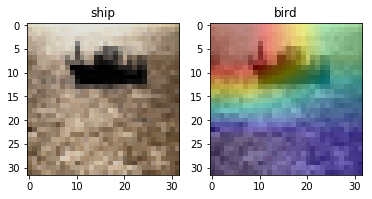

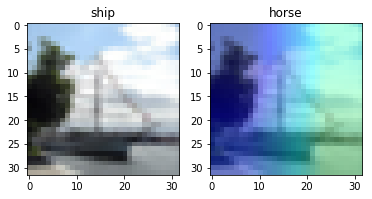

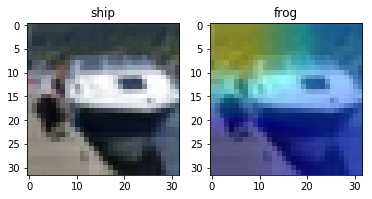

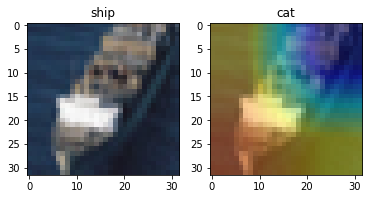

------------- actual: truck ----------------


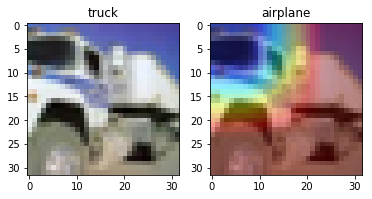

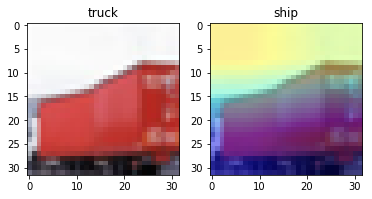

In [60]:

# get the last conv layer - stage4_unit2_conv2 (1x1x512) to look at
#conv_layer_name = 'stage4_unit2_conv2'  # 1x1x512 - low res
 
conv_layer_name = 'stage3_unit2_conv2'  # 2x2x256 - try some intermediate conv layer
num_channel = 256

# show 5 failures
for i in range(0, 10):
  print('------------- actual:', label_names[i], '----------------')
  for fail_id in  group_fail_list[i]:
    # get pred class
    #fail_id = pred_fail[i]
    pred_class = pred[fail_id]

    # get the image
    fail_img = X_val[fail_id]

    conv_layer_out = get_GradCAM(fail_img, pred_class, conv_layer_name, num_channel)
  
    heatmap_img = get_heat_map(fail_img, conv_layer_out)
  
    actual_label = label_names[int(y_val[fail_id])]
    pred_label   = label_names[pred[fail_id]]
  
    #display_images(fail_img, actual_label, heatmap_img, pred_label)
    display_images_side_by_side(fail_img, actual_label, heatmap_img, pred_label)
    #cv_display_images(fail_img, actual_label, heatmap_img, pred_label)
  